In [152]:
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
V1 = 105 # phase voltage (V) 
R1 = 0.047  # stator winding resistance 
X1 = 0.433  # stator reactance
X2 = 0.623  # rotor reactance
R2 = 0.05    # rotor winding resistance 
f = 400      # frequency, Hz
p = 4 # number of poles
omega_s = 2 * math.pi * 2*f/p
J = 0.000675
Xm=8.71
Rc=5

def dxdt(t, x):
    omega_r = x[0]
    s = (omega_s - omega_r)/omega_s
    k =  (3*R2*V1**2)*((1-s)/s) 
    #d=((R1+((R2*(Xm**2)/s)/((R2/s)**2 +(Xm+X2)**2)))**2) + ((X1 +((Xm*X2*(Xm+X2)+R2*R2*Xm/s)/((R2/s)**2 +(Xm+X2)**2)))**2)
#     d = (R1+R2/s)**2+(X1+X2)**2 
    dr=((R2/s)**2 + X2**2)
    z1=R1 + X1*1j
    z2inv=((1/Rc)+ R2/(s*dr)) -(1/Xm +X2/dr)*1j
    z2=1/z2inv
    z=z1+z2
    Z=(abs(z))**2
    
#     Dr=((Rc*(R2/s) - X2 *Xm)**2)+((Rc*(Xm+X2)+R2*Xm/s)**2)
#     d1=( R1+ (R2*(((Xm) **2)+((X2)**2))+(R2*Rc*Xm*Xm/s)*(Rc + (R2/s)))/Dr )
#     d2=( X1+ (Rc*Rc*X2*Xm*(Xm+X2)+R2*Rc*R2*Rc/(s*s))/Dr )
#     d=((d1) **2)+((d2) **2)
    power = k/Z
    
#     power = k/d
    dwr_dt = power/(J*omega_r)

    return [dwr_dt]


In [154]:
s0 = [0.01]
t0 = 0

solver = integrate.ode(dxdt)

solver.set_integrator('dopri5')
solver.set_initial_value(s0, t0)

t_end = 1
dt = 0.000005

omega = []
t = []

while solver.successful() and solver.t < t_end:
    w_r = solver.integrate(solver.t+dt)

    t.append(solver.t)
    omega.append(w_r*60/(2*math.pi))


/usr/local/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


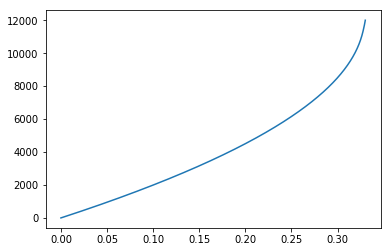

In [155]:
plt.plot(t, omega)

In [146]:
s = np.linspace(0.01,1,100) #slip
k =  ((3*R2*V1**2)/(omega_s*s)) 
d = (R1+R2/s)**2+(X1+X2)**2; 
torque = k/d

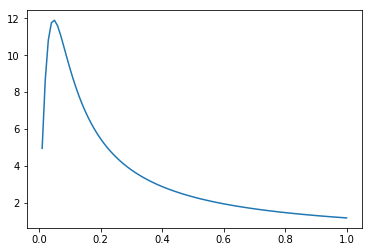

In [70]:
plt.plot(s,torque)